In [156]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import sys 
np.set_printoptions(threshold=sys.maxsize)

In [157]:
#base vectors from which we will make the dipole matrix. Ket vectors. The bra vectors are complex conjugate of ket vectors
base_vectors_ket = np.array([[0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0],
                        [1, 0, 0, 1], [0, 1, 0, 1], [0, 1, 1, 0], [0, 0, 1, 1], [1, 1, 1, 0], [0, 1, 1, 1], [1, 1, 0, 1], 
                        [1, 0, 1, 1], [1, 1, 1, 1]])

In [158]:
#we make matrix of zero elements 16*16
dipole_matrix = np.zeros((16,16))

In [159]:
#code to fill dipole matrix from dipole potental using ladder operators 
for i in range(16):
    for j in range(16):
        for m in range(4):
            temp_vec = np.array([0, 0, 0, 0])
            temp_vec = np.array(base_vectors_ket[j])
            
            if temp_vec[m] % 2 == 0 :
                continue
                
            if temp_vec[m] % 2 == 1:
                temp_vec[m] = 0
                if np.array_equal(base_vectors_ket[i], temp_vec):
                    dipole_matrix[i][j] = 1
                    
for i in range(16):
    for j in range(16):
        for m in range(4):
            temp_vec = np.array([0, 0, 0, 0])
            temp_vec = np.array(base_vectors_ket[j])
            
            if temp_vec[m] % 2 == 1 :
                continue
                
            if temp_vec[m] % 2 == 0:
                temp_vec[m] = 1
                if np.array_equal(base_vectors_ket[i], temp_vec):
                    dipole_matrix[i][j] = 1 

In [160]:
# now we take enrgy equal to one. Later we change it by energy of electrical field
dipole_matrix

array([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,

In [161]:
#Water soluable Chlorophyll Protein have four molecules. In this matrix we 
#have couplings(strengths) between molecules
Coupling_matrix = np.array([[0, 70, 6, 13],
                           [70, 0, 13, 6],
                           [6, 13, 0, 70],
                           [13, 6, 70, 0]])
Coupling_matrix

array([[ 0, 70,  6, 13],
       [70,  0, 13,  6],
       [ 6, 13,  0, 70],
       [13,  6, 70,  0]])

In [162]:
#We create matrix of zero elements for hamiltonian(energy of the system)
Hamiltonian = np.zeros((16, 16))

In [163]:
#Using Frenkel Exciton hamiltonian we will the matrix using coupling matrix and base site energy 14000 cm^(-1)
for i in range(16):
    for j in range(16):
        for n in range(4):
            for m in range(4):
                temp_vec = np.array([0, 0, 0, 0])
                temp_vec = np.array(base_vectors_ket[j])
            
                if temp_vec[m] % 2 == 0:
                    continue
                
                elif temp_vec[m] % 2 ==1:
                    temp_vec[m] = 0
                
                    temp_vec_2 = np.array(temp_vec)
                
                
                    if temp_vec_2[n] % 2 == 1:
                        continue
                        
                    elif temp_vec_2[n] % 2 == 0 :
                        temp_vec_2[n] = 1
                        
                        if np.array_equal(base_vectors_ket[i], temp_vec_2):
                            Hamiltonian[i][j] = Coupling_matrix[n][m]
                            
for i in range(16):
    for j in range(16):
        for m in range(4):
            temp_vec = np.array([0, 0, 0, 0])
            temp_vec = np.array(base_vectors_ket[j])
            
            if temp_vec[m] % 2 == 0 :
                continue
                
            if temp_vec[m] % 2 == 1:
                temp_vec[m] = 1
                
                if np.array_equal(base_vectors_ket[i], temp_vec) and j < 5:
                    Hamiltonian[i][j] = 14000
                    
                elif np.array_equal(base_vectors_ket[i], temp_vec) and ( 5 <= j and j < 11 ):
                    Hamiltonian[i][j] = 14000 * 2 
                    
                elif np.array_equal(base_vectors_ket[i], temp_vec) and ( 11 <= j and j < 15 ):
                    Hamiltonian[i][j] = 14000*3
                    
                elif np.array_equal(base_vectors_ket[i], temp_vec) and j == 15:
                    Hamiltonian[i][j] = 14000*4

In [111]:
Hamiltonian

array([[0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 1.4e+04, 7.0e+01, 6.0e+00, 1.3e+01, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 7.0e+01, 1.4e+04, 1.3e+01, 6.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 6.0e+00, 1.3e+01, 1.4e+04, 7.0e+01, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 1.3e+01, 6.0e+00, 7.0e+01, 1.4e+04, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.8e+04, 1.3e+01,
        6.0e+00, 1.3e+01, 6.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+

In [112]:
# we find the eigenvalues(energy) and eigenvectors(wave functions) of hamiltonian
w, v = LA.eigh(Hamiltonian)

In [113]:
#eigenvalues
w

array([    0.        , 13923.        , 13937.        , 14051.        ,
       14089.        , 27859.29056134, 27995.71799643, 28000.        ,
       28000.        , 28000.        , 28144.99144223, 41923.        ,
       41937.        , 42051.        , 42089.        , 56000.        ])

In [114]:
#Eigenvectors
v

array([[ 1.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.        ],
       [ 0.        ,  0.5       ,  0.5       ,  0.5       , -0.5       ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.        ],
       [ 0.        , -0.5       , -0.5       ,  0.5       , -0.5       ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.        ],
       [ 0.        ,  0.5       , -0.5       , -0.5       , -0.5       ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.        ],
       [ 0.        , -0.5       ,  0

In [115]:
Ham_Eigenvalues = w

In [116]:
Ham_Eigenvectors = v

In [117]:
Ham_Eigenvectors_tr = np.transpose(Ham_Eigenvectors)

In [164]:
#Using dipole matrix we connect separate blocks of excitations:0, 1, 2, 3, 4
Dipole_matrix_in_base_ham = Ham_Eigenvectors_tr@dipole_matrix@Ham_Eigenvectors
D_M_H = Dipole_matrix_in_base_ham

In [165]:
D_M_H

array([[ 0.00000000e+00,  1.55431223e-14,  3.83582055e-14,
        -4.95159469e-14, -2.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.55431223e-14,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.34064588e-14,
         2.56032453e-12, -8.24963922e-01,  5.93174104e-01,
         9.83655941e-01, -3.16488739e-14,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.83582055e-14,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.58067823e-14,
        -1.24440259e-13, -1.10196964e+00, -7.50490189e-01,
        -4.71622073e-01, -3.08158662e-14,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-4.95159469e-14,  0.00000000e

In [120]:
eigv = np.zeros((16, 16))
#we make matrix 16*16 to fill on diagonal eigenvalues(energies)
for i in range(len(w)):
    eigv[i, i] = Ham_Eigenvalues[i]
    
eigv

array([[    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        , 13923.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        , 13937.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , 14051.        ,
            0.        ,     0.        ,     0.        ,     0

In [121]:
#we create two dimensional correlation stpectra of couplings between molecules
x = np.linspace(27800,28300, num=500)
y = np.linspace(13800,14300, num=500)
X, Y = np.meshgrid(x,y)
Z = np.zeros((500, 500))

for i in range(len(Z[0:])):
    for j in range(len(Z[0:])):
        for n in np.arange(1,5):
            for m in np.arange(5,12):
                for s in np.arange(1,5):
                    #H_1, H_2, H_3 energy differencies between ground state(0) and excitations
                    H_1 = eigv[m, m] - eigv[0,0]
                    H_2 = eigv[s, s] - eigv[0,0]
                    H_3 = eigv[m, m] - eigv[s,s]
                    #We calculate Feynman diagrams for two excitations
                    Z[i, j] = Z[i, j] + ((((D_M_H[0,s]*D_M_H[s, m]*D_M_H[m, n]*D_M_H[n,0])/
                                          (((1j*X[i,j] - 1j*H_1) - 20)*((1j*Y[i,j] - 1j*H_2)-20))) 
                                          -((D_M_H[0,s]*D_M_H[s,1]*D_M_H[m,n]*D_M_H[n,1])/
                                           (((1j*X[i,j] - 1j*H_1) - 20)*((1j*Y[i,j] - 1j*H_3)-20)))))

C:\Users\proto\AppData\Local\Temp\ipykernel_26724\2036907439.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  Z[i, j] = Z[i, j] + ((((D_M_H[0,s]*D_M_H[s, m]*D_M_H[m, n]*D_M_H[n,0])/


In [142]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)

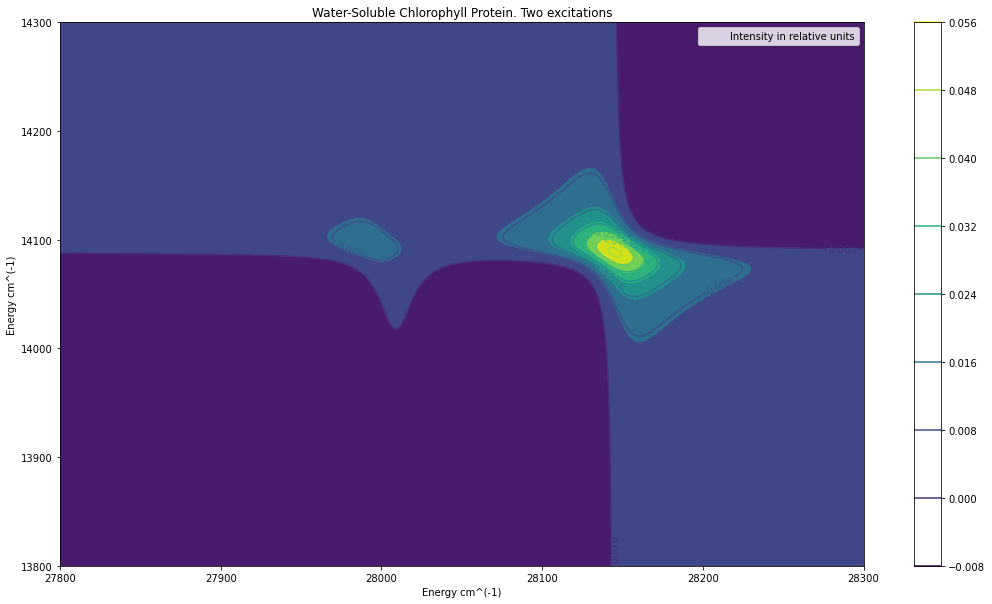

In [148]:

maxG = np.max(np.max(np.abs(Z)))
plt.contourf(X, Y, np.arcsinh(Z/maxG)*100)
out = plt.contour(X, Y, Z)
plt.clabel(out, inline=True,
fontsize=10)
plt.colorbar(out)
plt.legend(['Intensity in relative units'])
plt.title("Water-Soluble Chlorophyll Protein. Two excitations")
plt.xlabel("Energy cm^(-1)")
plt.ylabel("Energy cm^(-1)")
plt.show()